# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | wuwei
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vorkuta
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ivdel'
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | egilsstadir
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | suleja
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | hermanus
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,5.73,87,100,3.09,US,1684152873
1,konkwesso,10.8469,4.0984,37.96,32,100,3.62,NG,1684153102
2,vadso,70.0744,29.7487,20.49,47,0,4.63,NO,1684153104
3,waitangi,-43.9535,-176.5597,13.92,74,37,8.36,NZ,1684152692
4,lautoka,-17.6167,177.4667,20.92,88,75,0.00,FJ,1684153106


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,5.73,87,100,3.09,US,1684152873
1,konkwesso,10.8469,4.0984,37.96,32,100,3.62,NG,1684153102
2,vadso,70.0744,29.7487,20.49,47,0,4.63,NO,1684153104
3,waitangi,-43.9535,-176.5597,13.92,74,37,8.36,NZ,1684152692
4,lautoka,-17.6167,177.4667,20.92,88,75,0.00,FJ,1684153106


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

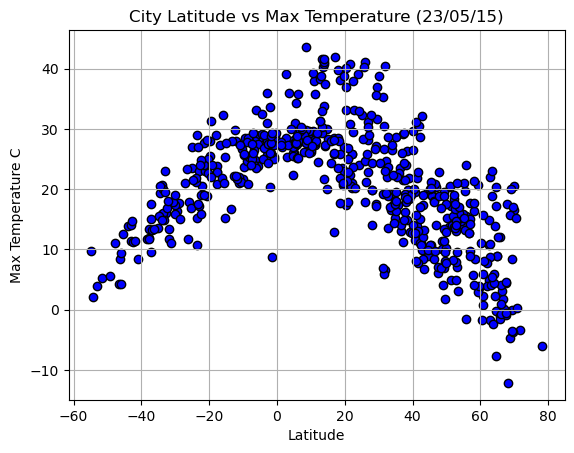

In [10]:
# Today date
today = time.strftime("%y/%m/%d")
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid()
plt.style.use('fast')
# Save the figure
plt.savefig("../output_data/Fig1.png" , dpi=80)

# Show plot
plt.show()

#### Latitude Vs. Humidity

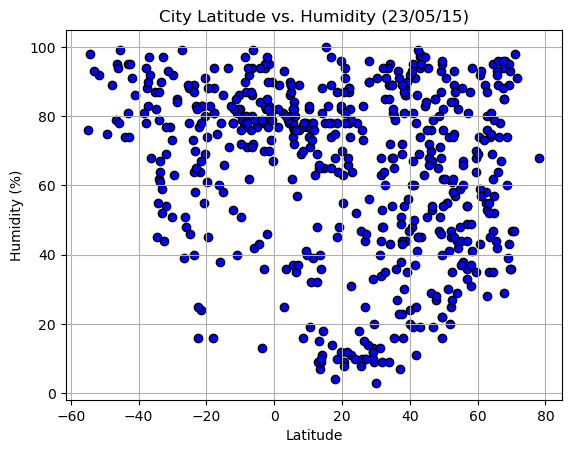

In [11]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

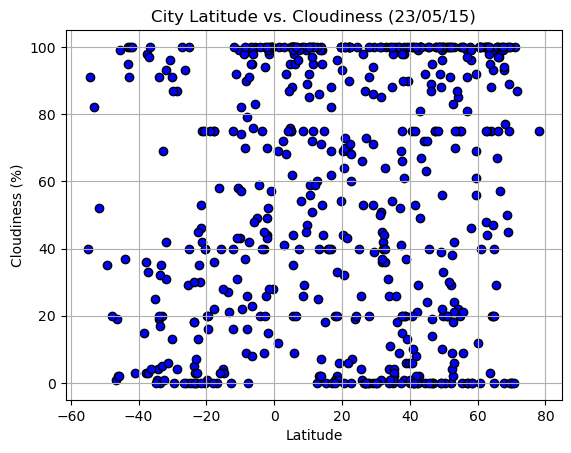

In [12]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

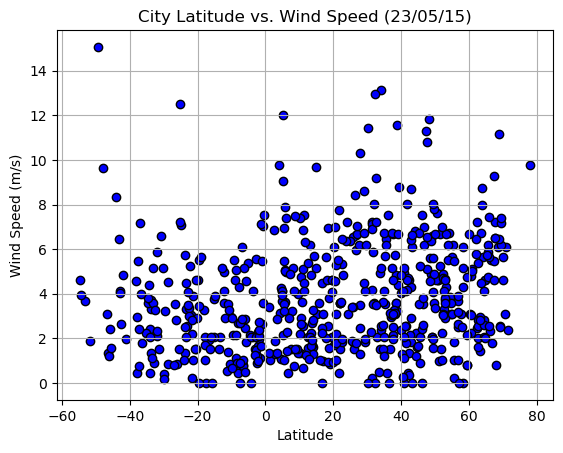

In [13]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression():
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
    regress_values=x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line_eq,(0,12),fontsize=15,color="red")
    print(f'The r-value is : {rvalue}')
    
# Define a function to measure correlation
def correlation():
    corr=st.pearsonr(x_values, y_values)
    print(f'the correlation between both factor is : {round(corr[0],2)}')
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,5.73,87,100,3.09,US,1684152873
1,konkwesso,10.8469,4.0984,37.96,32,100,3.62,NG,1684153102
2,vadso,70.0744,29.7487,20.49,47,0,4.63,NO,1684153104
5,kain,50.6379,3.3809,13.66,91,100,7.63,BE,1684153107
7,labytnangi,66.6572,66.4183,1.78,78,57,5.51,RU,1684152895


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,13.92,74,37,8.36,NZ,1684152692
4,lautoka,-17.6167,177.4667,20.92,88,75,0.00,FJ,1684153106
6,santa helena,-2.2311,-45.3000,28.48,78,44,2.27,BR,1684153108
8,codrington,-38.2667,141.9667,11.68,81,15,4.55,AU,1684152864
11,uturoa,-16.7333,-151.4333,27.29,75,0,1.91,PF,1684152693


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.7728996882485571


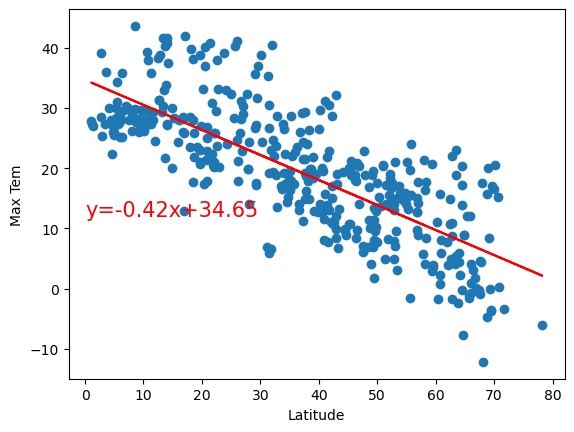

the correlation between both factor is : -0.77


In [17]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

correlation()

The Max Tempature vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is -0.86 , the data seems to show , the max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere.

The r-value is : 0.8252950618444189


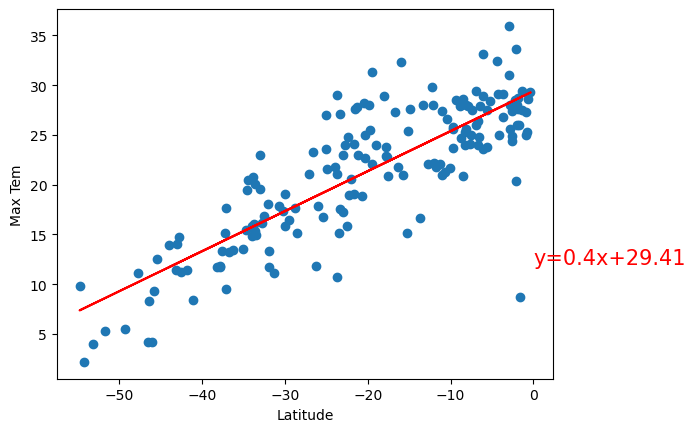

the correlation between both factor is : 0.83


In [18]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

correlation()

The Max Tempature vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.3 ,Unlike northern hemisphere,  the data seems to show no relationship between max tempature and latitude for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.015268993433226345


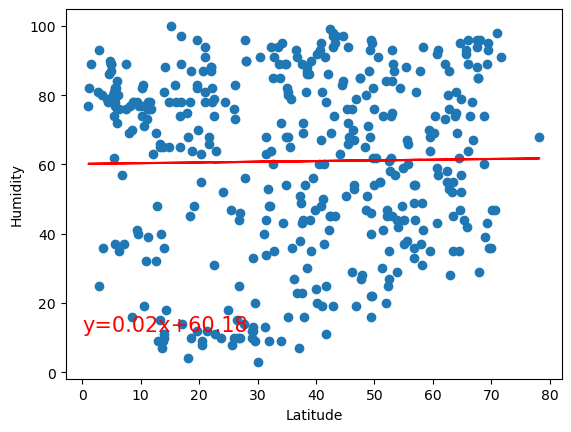

the correlation between both factor is : 0.02


In [19]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

correlation()

The Humidity vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is 0.44 , the data seems to show no relationship between Humidity and latitude for the northern hemisphere.

The r-value is : -0.07926772735383981


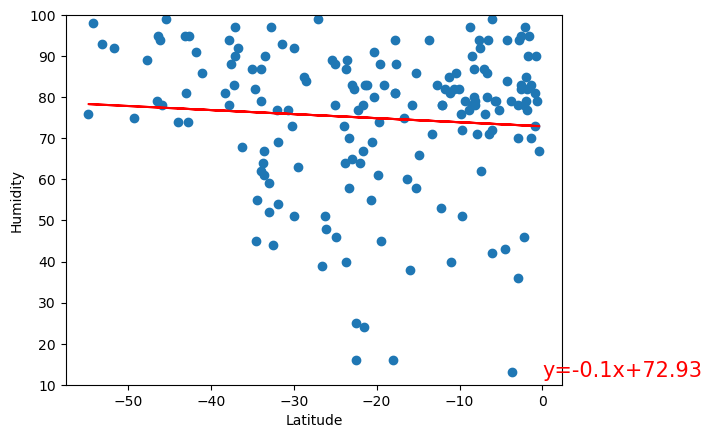

the correlation between both factor is : -0.08


In [20]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(10,100)
plt.show()

correlation()

The Humidity vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.35 , the data seems to show no relationship between Humidity and latitude for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : -0.01292270156227245


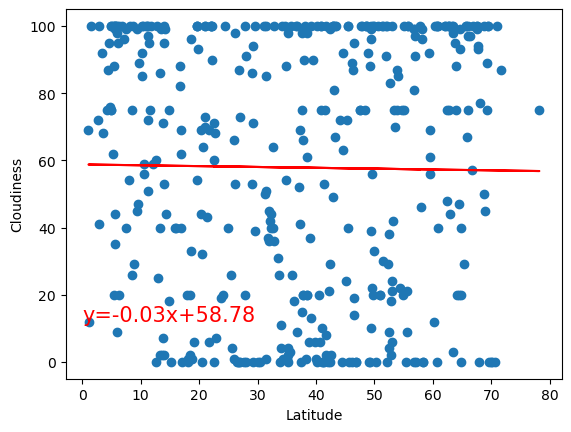

the correlation between both factor is : -0.01


In [21]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

correlation()

The Cloudiness vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is 0.24 , the data seems to show no relationship between cloudiness and latitude for the northern hemisphere.

The r-value is : 0.18652865322220616


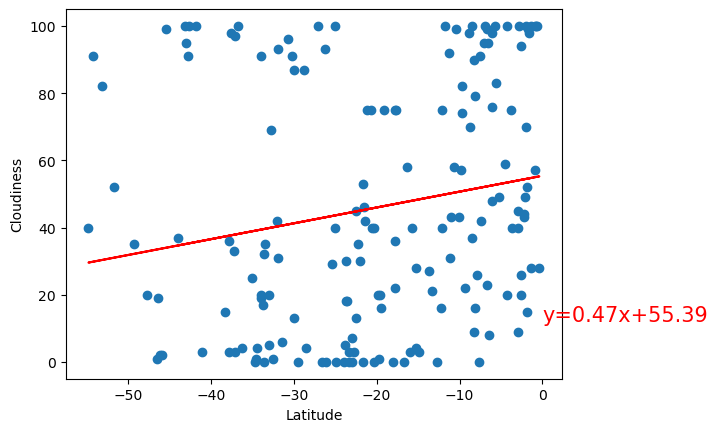

the correlation between both factor is : 0.19


In [22]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

correlation()

 The Cloudiness vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.3 , the data seems to show no relationship between cloudiness and latitude for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.11838748786169337


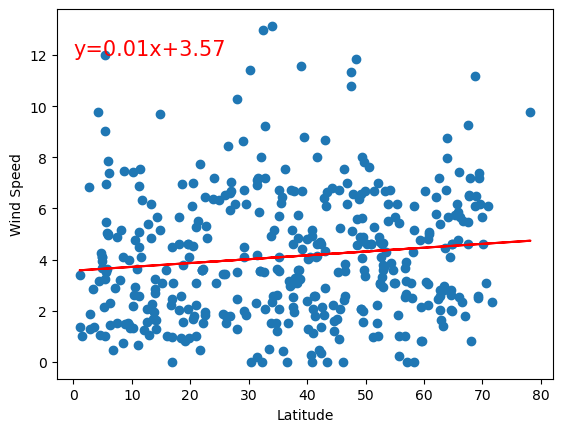

the correlation between both factor is : 0.12


In [23]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
correlation()

The Wind Speed vs. Latitude plot for cities in the northern hemisphere is shown above. the correlation value is 0.08 , the data seems to show no relationship between wind speed and latitude for the northern hemisphere. 

The r-value is : -0.20355211368995949


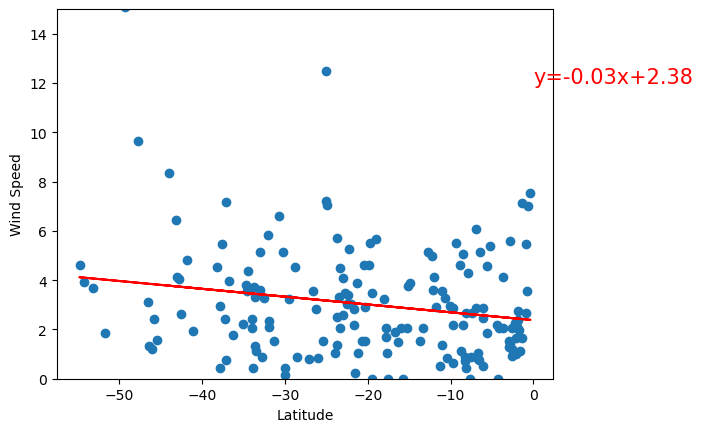

the correlation between both factor is : -0.2


In [24]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0,15)
plt.show()
correlation()

 The Wind Speed vs. Latitude plot for cities in the southern hemisphere is shown above. the correlation value is -0.36 , the data seems to show no relationship between wind speed and latitude for the southern hemisphere. 